<a href="https://colab.research.google.com/github/virf96/Chat-Bot/blob/master/TransformacionVariables_Gausiana_sklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Transformación Gaussiana con Scikit-learn

Scikit-learn tiene transformadores que también crean mapeos Gaussianos. Por ejemplo el PowerTransformer permite hacer la transformación Box-Cox y Yeo-Johnson. Con el FunctionTransformer, podemos especificar cualquier función deseada.

Los transformadores de por sí, no permiten seleccionar columnas, pero podemos usar un tercer transformador, el ColumnTransformer, para lograrlo.

Algo más para tener en cuenta es que los transformadores de Scikit-learn retornan arreglos de NumPy, y no dataframes, por lo tanto debemos estar atentos al orden de las columnas para no mezclar las variables.

## Importante

Las transformaciones Box-Cox y Yeo-Johnson necesitan aprender sus parámetros de los datos. Por lo tanto, como siempre, antes de intentar cualquier transformación, es importante dividir el conjunto de datos en sets de entrenamiento y prueba.

Para hacer el demo más sencillo, no lo haremos, pero cuando uses este tipo de transformaciones en tus pipelines por favor asegúrate de dividir tus datos en entrenamiento y prueba.


## En este demo

Verás cómo implementar transformaciones para variables usando Scikit-learn y los datos del Boston House Price.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import scipy.stats as stats

from sklearn.preprocessing import FunctionTransformer, PowerTransformer

import warnings
warnings.filterwarnings("ignore")

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# cargar los datos

data = pd.read_csv('/content/drive/MyDrive/datasets/houseprice.csv')

data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Veamos el porcentaje de NA que tienen las variables

In [11]:
data.isna().mean()

Id               0.000000
MSSubClass       0.000000
MSZoning         0.000000
LotFrontage      0.177397
LotArea          0.000000
                   ...   
MoSold           0.000000
YrSold           0.000000
SaleType         0.000000
SaleCondition    0.000000
SalePrice        0.000000
Length: 81, dtype: float64

Seleccionemos las variables numéricas y positivas en el conjunto de datos para la demostración. La mayoría de las transformaciones requiren que las variables sean positivas

In [5]:
cols = []

for col in data.columns:

    if data[col].dtypes != 'O' and col != 'Id':  # si la variable es numérica
        
        if np.sum(np.where(data[col] <= 0, 1, 0)) == 0:  # si la variable es positiva
        
            cols.append(col)  # a

cols

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 '1stFlrSF',
 'GrLivArea',
 'TotRmsAbvGrd',
 'GarageYrBlt',
 'MoSold',
 'YrSold',
 'SalePrice']

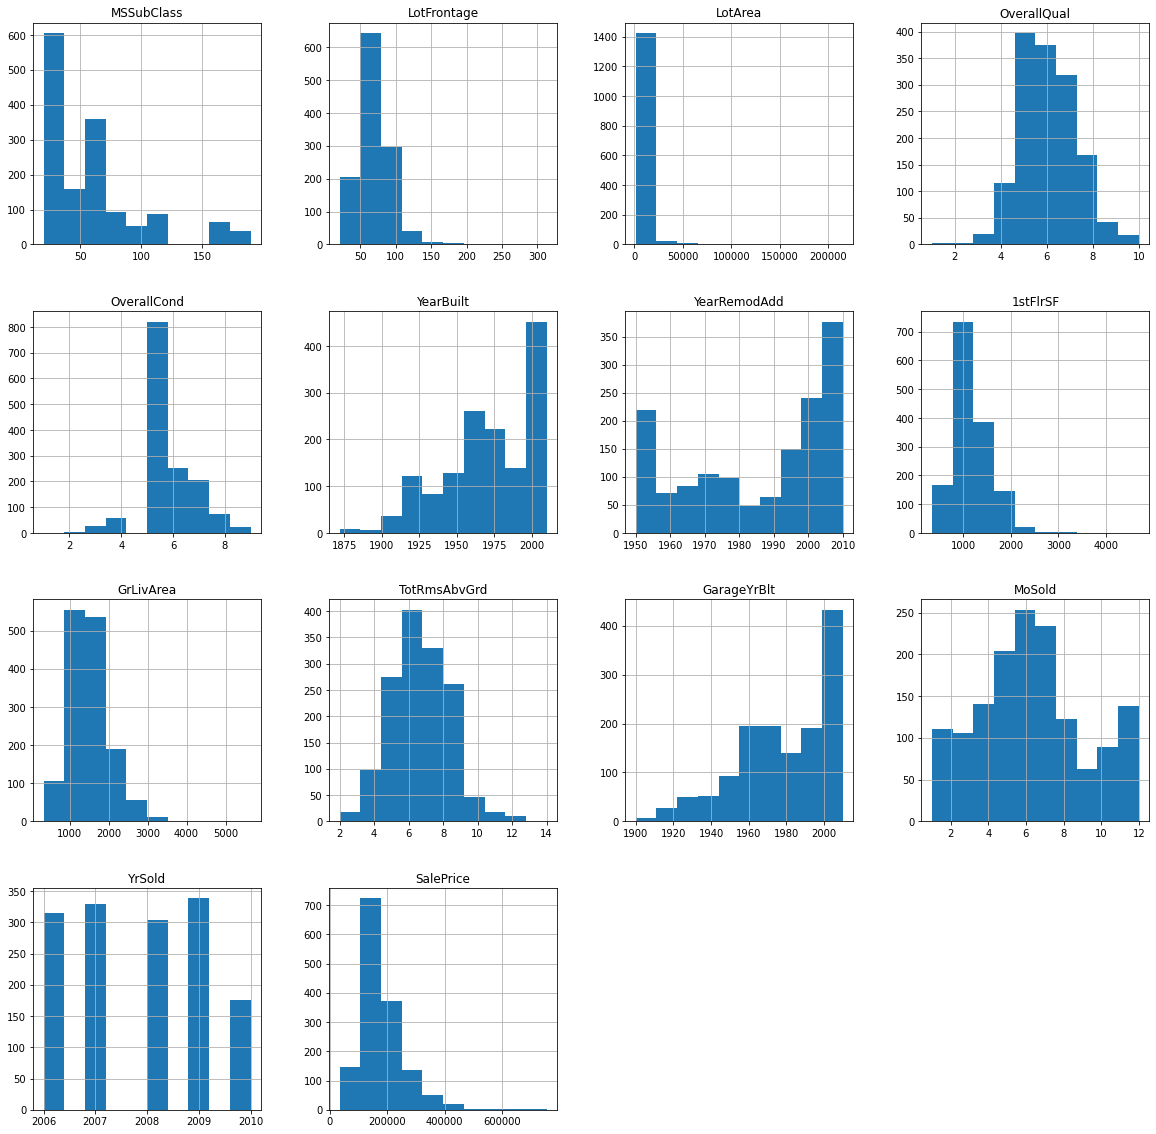

In [6]:
# exploremos las distribuciones de las variables numéricas

data[cols].hist(figsize=(20,20))
plt.show()

## Gráficas para evaluar normalidad

Para visualizar la distribución de las variables, usamos histogramas y gráficas Q-Q. En los gráficos Q-Q, si la variable está normalmente distribuida, los valores de la variable deberían estar sobre la línea de 45 grados cuando se grafican en contra de los cuantiles teóricos. Esto lo discutimos en mas detalle en la Sección 3 del curso.

In [7]:
# graficar los histogramas para evaluar rápidamente
# la distribución de las variables

# histograma y gráficos Q-Q 

def diagnostic_plots(df, variable):
    
    # función para graficar un histograma y un gráfico Q-Q 
    
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[variable].hist(bins=30)

    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)

    plt.show()

### Transformación Logarítmica


In [8]:
# Crea un transformador logarítmico. (log transformer)
transformer = FunctionTransformer(np.log, validate=True)

In [12]:
# transforma todas las variables numéricas y positivas
data_t = transformer.transform(data[cols].fillna(1))

In [14]:
data_t

array([[ 4.09434456,  4.17438727,  9.04192172, ...,  0.69314718,
         7.60489448, 12.24769432],
       [ 2.99573227,  4.38202663,  9.16951838, ...,  1.60943791,
         7.60439635, 12.10901093],
       [ 4.09434456,  4.21950771,  9.32812341, ...,  2.19722458,
         7.60489448, 12.31716669],
       ...,
       [ 4.24849524,  4.18965474,  9.10963567, ...,  1.60943791,
         7.60589   , 12.49312952],
       [ 2.99573227,  4.21950771,  9.18163221, ...,  1.38629436,
         7.60589   , 11.86446223],
       [ 2.99573227,  4.31748811,  9.20402044, ...,  1.79175947,
         7.60489448, 11.90158345]])

In [15]:
data.shape

(1460, 81)

In [16]:
# Scikit-learn retorna un arreglo NumPy, 

# para seguir con la demo conveertimos el arrelgo
# en un dataframe. Hay que tener cuidado
# con las columnas!!

data_t = pd.DataFrame(data_t, columns = cols)

In [17]:
data_t.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,1stFlrSF,GrLivArea,TotRmsAbvGrd,GarageYrBlt,MoSold,YrSold,SalePrice
0,4.094345,4.174387,9.041922,1.945910,1.609438,7.602401,7.602401,6.752270,7.444249,2.079442,7.602401,0.693147,7.604894,12.247694
1,2.995732,4.382027,9.169518,1.791759,2.079442,7.588830,7.588830,7.140453,7.140453,1.791759,7.588830,1.609438,7.604396,12.109011
2,4.094345,4.219508,9.328123,1.945910,1.609438,7.601402,7.601902,6.824374,7.487734,1.791759,7.601402,2.197225,7.604894,12.317167
3,4.248495,4.094345,9.164296,1.945910,1.609438,7.557473,7.585789,6.867974,7.448334,1.945910,7.599902,0.693147,7.603898,11.849398
4,4.094345,4.430817,9.565214,2.079442,1.609438,7.600902,7.600902,7.043160,7.695303,2.197225,7.600902,2.484907,7.604894,12.429216


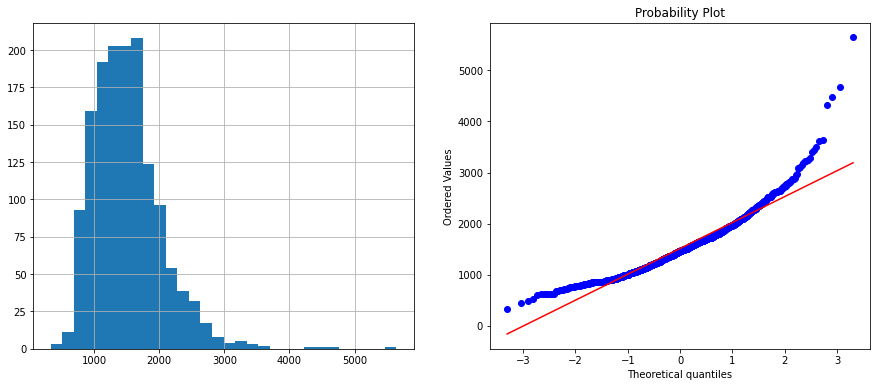

In [18]:
# distribución original

diagnostic_plots(data, 'GrLivArea')

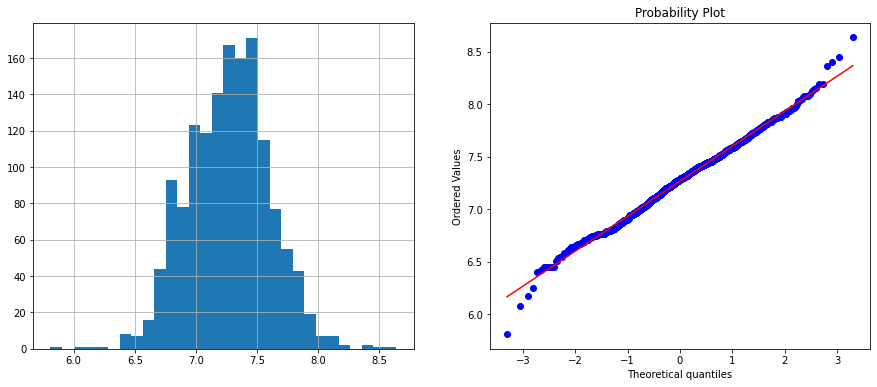

In [19]:
# distribución transformada
diagnostic_plots(data_t, 'GrLivArea')

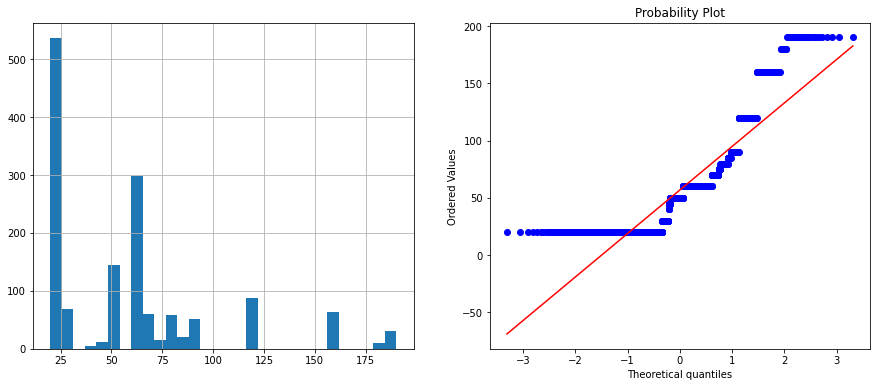

In [20]:
# distribución original
diagnostic_plots(data, 'MSSubClass')

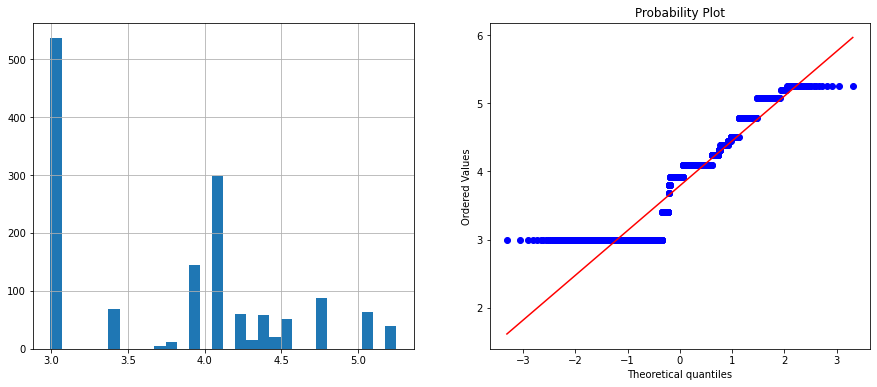

In [21]:
# distribución transformada

diagnostic_plots(data_t, 'MSSubClass')

### Transformación Recíproca

In [22]:
# crea el transformer
transformer = FunctionTransformer(lambda x: 1/x, validate=True)

# también
# transformer = FunctionTransformer(np.reciprocal, validate=True)

# transforma las variables positivas
data_t = transformer.transform(data[cols].fillna(1))

# guarda nuevamente los datos en un dataframe
data_t = pd.DataFrame(data_t, columns = cols)

In [23]:
data_t.head(3)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,1stFlrSF,GrLivArea,TotRmsAbvGrd,GarageYrBlt,MoSold,YrSold,SalePrice
0,0.016667,0.015385,0.000118,0.142857,0.200,0.000499,0.000499,0.001168,0.000585,0.125000,0.000499,0.500000,0.000498,0.000005
1,0.050000,0.012500,0.000104,0.166667,0.125,0.000506,0.000506,0.000792,0.000792,0.166667,0.000506,0.200000,0.000498,0.000006
2,0.016667,0.014706,0.000089,0.142857,0.200,0.000500,0.000500,0.001087,0.000560,0.166667,0.000500,0.111111,0.000498,0.000004


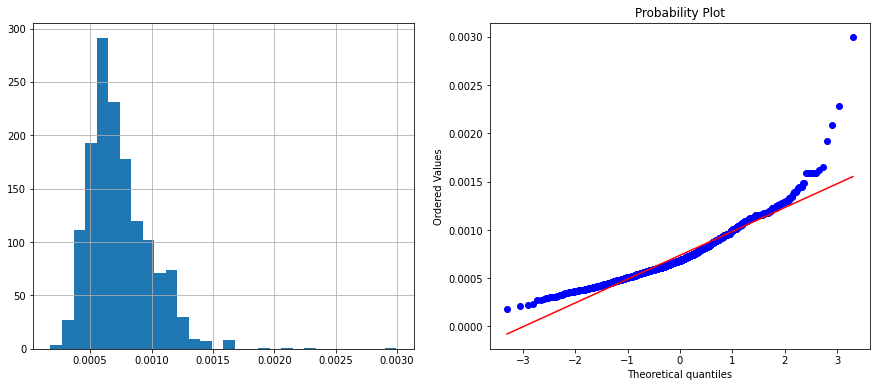

In [24]:
# variable transformada 
diagnostic_plots(data_t, 'GrLivArea')

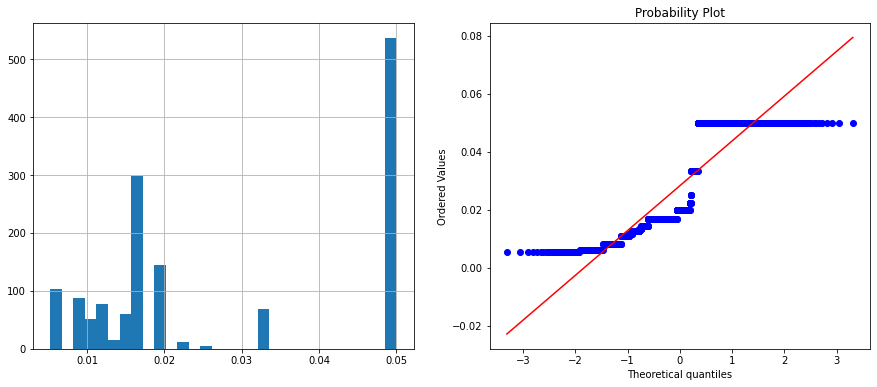

In [25]:
# variable transformada 
diagnostic_plots(data_t, 'MSSubClass')

### Transformación Raíz cuadrada

In [26]:
transformer = FunctionTransformer(lambda x: x**(1/2), validate=True)

# también
# transformer = FunctionTransformer(np.sqrt, validate=True)

data_t = transformer.transform(data[cols].fillna(1))

data_t = pd.DataFrame(data_t, columns = cols)

In [27]:
data_t.head(3)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,1stFlrSF,GrLivArea,TotRmsAbvGrd,GarageYrBlt,MoSold,YrSold,SalePrice
0,7.745967,8.062258,91.923882,2.645751,2.236068,44.754888,44.754888,29.257478,41.352146,2.828427,44.754888,1.414214,44.810713,456.618002
1,4.472136,8.944272,97.979590,2.449490,2.828427,44.452222,44.452222,35.524639,35.524639,2.449490,44.452222,2.236068,44.799554,426.028168
2,7.745967,8.246211,106.066017,2.645751,2.236068,44.732538,44.743715,30.331502,42.261093,2.449490,44.732538,3.000000,44.810713,472.757866


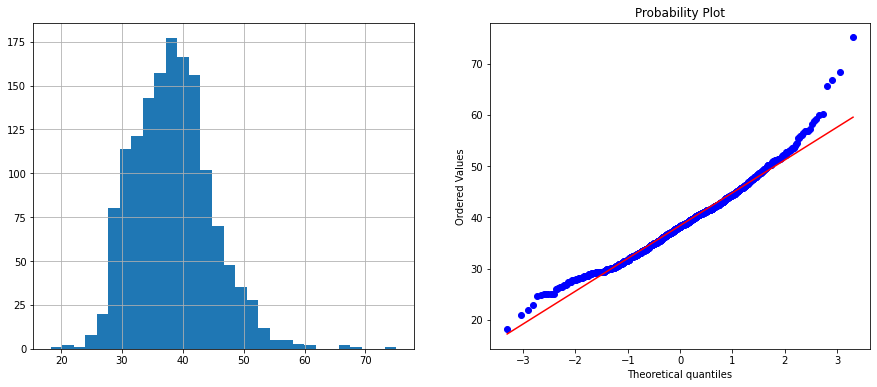

In [28]:
diagnostic_plots(data_t, 'GrLivArea')

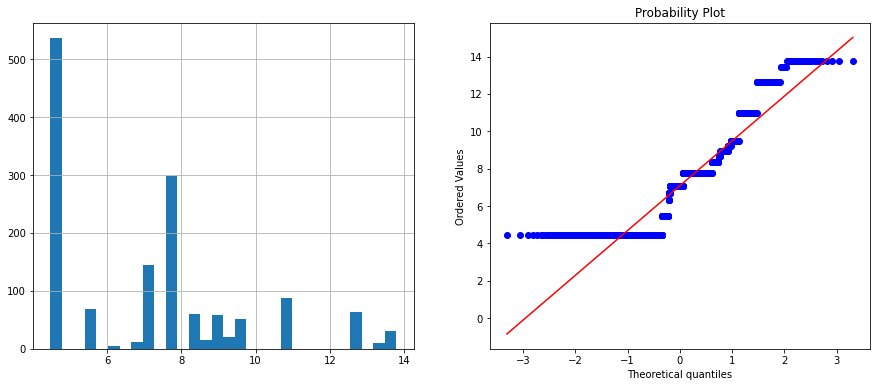

In [29]:
diagnostic_plots(data_t, 'MSSubClass')

### Transformación Exponencial

In [30]:
transformer = FunctionTransformer(lambda x: x**(1/1.2), validate=True)

data_t = transformer.transform(data[cols].fillna(1))

data_t = pd.DataFrame(data_t, columns = cols)

In [32]:
data_t.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,1stFlrSF,GrLivArea,TotRmsAbvGrd,GarageYrBlt,MoSold,YrSold,SalePrice
0,30.324434,32.416127,1872.322218,5.061140,3.823622,564.158052,564.158052,277.797375,494.496731,5.656854,564.158052,1.781797,565.331377,27076.241733
1,12.139245,38.539699,2082.377012,4.451018,5.656854,557.813624,557.813624,383.898247,383.898247,4.451018,557.813624,3.823622,565.096751,24121.104554
2,30.324434,33.658190,2376.623764,5.061140,3.823622,563.688585,563.923329,295.000797,512.744738,4.451018,563.688585,6.240251,565.331377,28690.047871
3,34.481147,30.324434,2073.334987,5.061140,3.823622,543.426295,556.401794,305.916444,496.183037,5.061140,562.984239,1.781797,564.862106,19428.533912
4,30.324434,40.138956,2895.784714,5.656854,3.823622,563.453823,563.453823,354.001068,609.569282,6.240251,563.453823,7.930813,565.331377,31498.026247


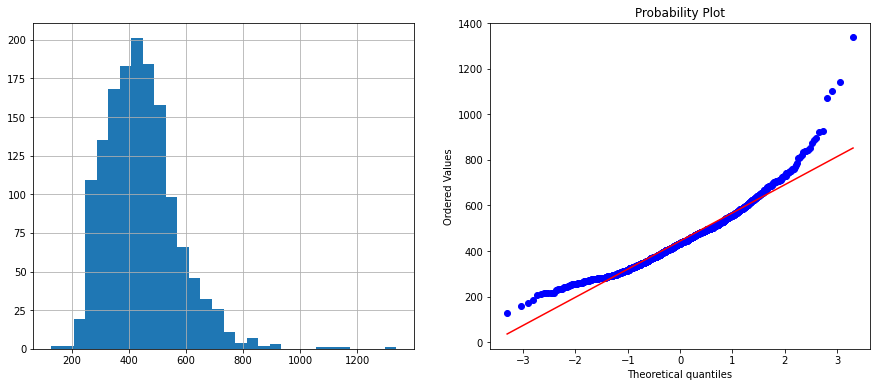

In [33]:
diagnostic_plots(data_t, 'GrLivArea')

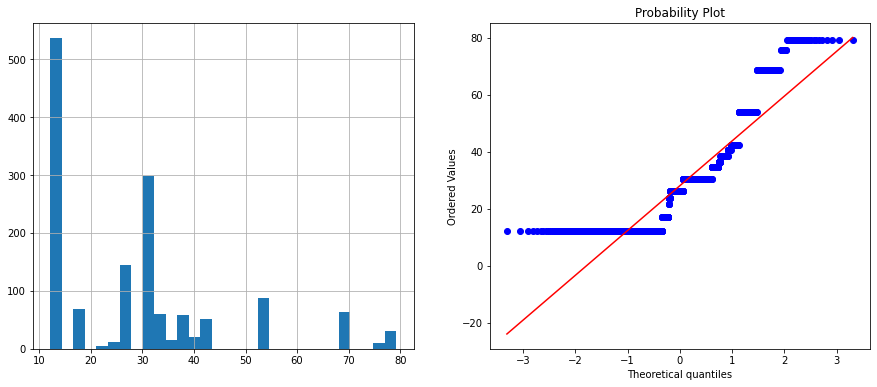

In [34]:
diagnostic_plots(data_t, 'MSSubClass')

### Transformación Box-Cox

In [35]:
# crea transformer
transformer = PowerTransformer(method='box-cox', standardize=False)

# encuentra lambda óptimo usando segmento de entrenamiento
transformer.fit(data[cols].fillna(1))

# transforma los datos
data_t = transformer.transform(data[cols].fillna(1))

# captura datos en un dataframe
data_t = pd.DataFrame(data_t, columns = cols)

In [36]:
data_t.head(3)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,1stFlrSF,GrLivArea,TotRmsAbvGrd,GarageYrBlt,MoSold,YrSold,SalePrice
0,2.742416,27.882658,10.433680,4.470077,2.287343,4.754153e+71,2.162702e+132,5.235744,7.621711,2.631068,2.235779e+07,0.917985,0.004501,7.932610
1,2.220973,32.703200,10.602809,3.829085,3.297391,3.521422e+71,1.247060e+132,5.460253,7.303622,2.192232,2.165961e+07,3.204135,0.004501,7.878263
2,2.742416,28.868539,10.813973,4.470077,2.287343,4.650265e+71,2.119329e+132,5.277966,7.667292,2.192232,2.230564e+07,5.800476,0.004501,7.959618


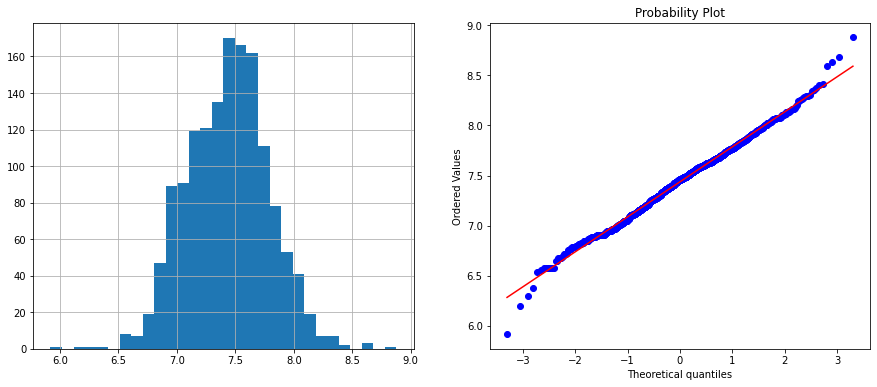

In [37]:
diagnostic_plots(data_t, 'GrLivArea')

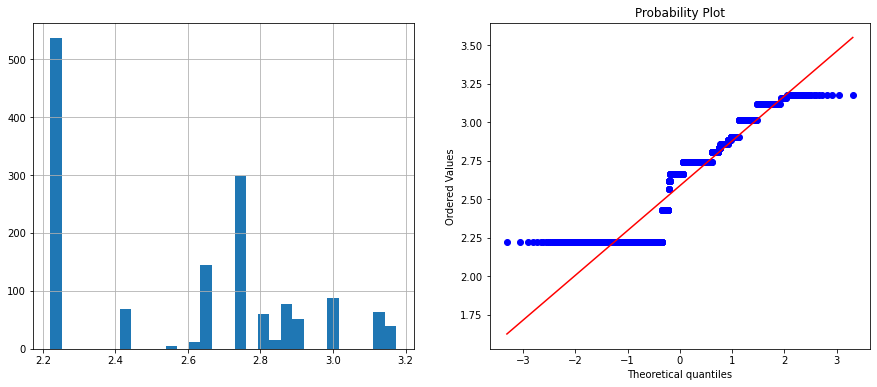

In [38]:
diagnostic_plots(data_t, 'MSSubClass')

### Yeo-Johnson

Yeo-Johnson es una adaptación de la transformación Box-Cox que puede también ser usada en variables con valores negativos. Expandamos la lista de variables para el demo, para incluir aquellas que contienen zeros y también valores negativos:

In [39]:
cols = [
    'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
    'OverallCond', 'MasVnrArea', 'BsmtFinSF1',
    'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
    'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
    'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
    'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
    'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
    'MiscVal', 'SalePrice'
]

In [40]:
# el transfomador
transformer = PowerTransformer(method='yeo-johnson', standardize=False)

# aprender lambda en el segmento de entrenamiento
transformer.fit(data[cols].fillna(1))

# transformar los datos
data_t = transformer.transform(data[cols].fillna(1))

# capturar los datos en un dataframe
data_t = pd.DataFrame(data_t, columns = cols)

In [41]:
data_t.head(3)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
0,2.661928,32.210544,10.427531,4.691018,2.235408,2.972693,15.235368,-0.0,20.452663,198.284295,5.219622,4.527843,-0.0,7.600484,0.425418,-0.000000,1.723636,0.352122,2.832075,0.390035,2.402306,-0.000000,1.144115e+08,2.51598,204.517915,-0.000000,4.227899,-0.0,-0.0,-0.0,-0.0,-0.0,7.932276
1,2.191299,37.998333,10.596445,4.145378,2.888050,-0.000000,16.750863,-0.0,28.330978,264.601145,5.442275,-0.000000,-0.0,7.284380,-0.000000,0.039486,1.723636,-0.000000,2.832075,0.390035,2.105656,0.607742,1.105001e+08,2.51598,177.329636,4.594581,0.000000,-0.0,-0.0,-0.0,-0.0,-0.0,7.877935
2,2.661928,33.389635,10.807340,4.691018,2.235408,2.919113,13.632899,-0.0,35.046589,209.206786,5.261495,4.533735,-0.0,7.645780,0.425418,-0.000000,1.723636,0.352122,2.832075,0.390035,2.105656,0.607742,1.141190e+08,2.51598,222.579733,-0.000000,3.844769,-0.0,-0.0,-0.0,-0.0,-0.0,7.959281


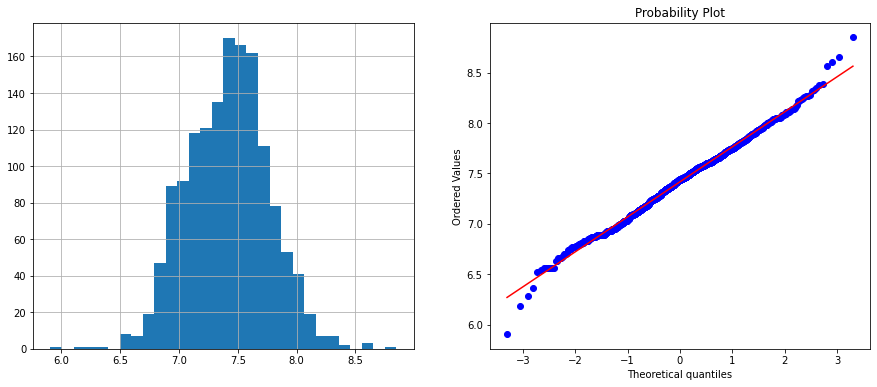

In [42]:
diagnostic_plots(data_t, 'GrLivArea')

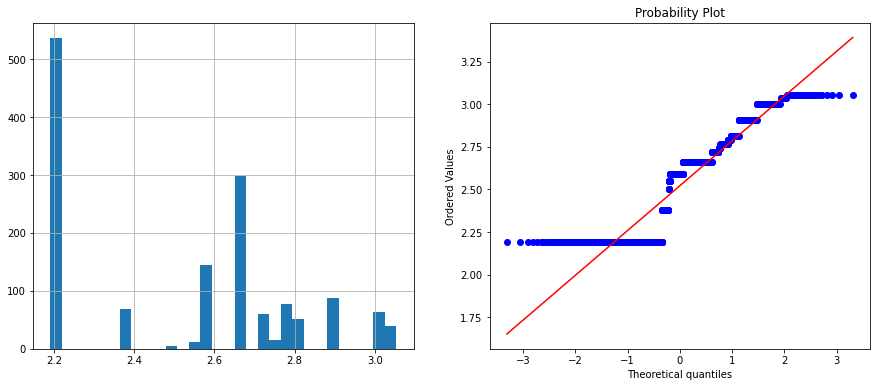

In [43]:
diagnostic_plots(data_t, 'MSSubClass')